# Mix Dataset (With rir and room config done)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import fftconvolve
import IPython
import pyroomacoustics as pra
import random
from scipy.io.wavfile import read, write
import csv
import pandas as pd
from tqdm import tqdm
import os 
from scipy.io.wavfile import read, write


RT60_MIN = 0
RT60_MAX = 0.2
ROOM_DIAMETER_RANGE_MIN = 1
ROOM_DIAMETER_RANGE_MAX = 5
MIC_NUM = 8
MIC_RADIUS = 0.1
SOURCE_NUM = 8
ROOM_NUM = 5
ROOM_LAYOUT_NUM = 10
FS = 16000
DATASET_PATH = "dataset_rir"

## Play with pyln

In [3]:
import soundfile as sf
import pyloudnorm as pyln

In [4]:
data, rate = sf.read("audios/1.wav") # load audio (with shape (samples, channels))
data = data[:32000]
meter = pyln.Meter(rate) # create BS.1770 meter
loudness = meter.integrated_loudness(data) # measure loudness

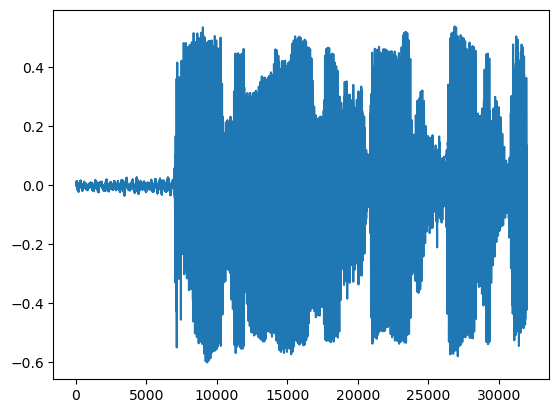

In [5]:
IPython.display.Audio(data, rate=16000)
plt.plot(data)

In [6]:
loudness_normalized_audio = pyln.normalize.loudness(data, loudness, -27.0)

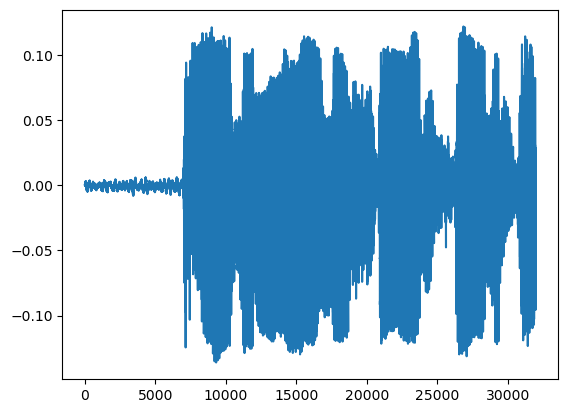

In [7]:
plt.plot(loudness_normalized_audio)

## CSV Format

In [8]:
# csv_file_name="yulun4/gen_dataset/mixture_audio/mixture_lookup.csv"
csv_file_name="mixture_audio/mixture_lookup.csv"

headers = [
            "scenario_idx"
            "room_idx",
            "room_layout_idx",
            "source_1_idx",
            "source_1_loudness"
            "source_2_idx",
            "source_2_loudness"
            "source_3_idx",
            "source_3_loudness"
            "source_4_idx",
            "source_4_loudness"
            "source_5_idx",
            "source_5_loudness"
            "source_6_idx",
            "source_6_loudness"
            "source_7_idx",
            "source_7_loudness"
            "source_8_idx",
            "source_8_loudness"
        ]
    
with open(csv_file_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headers)

## Load WAV Path

### Experiment glob shit

In [9]:
import glob

In [10]:
paths = glob.glob('audios/*.wav')
print(paths)

['audios/source_2.wav', 'audios/source_1.wav', 'audios/1.wav']


### Check LibriTTS

In [11]:
# /media/synrg/NVME-2TB/alanweiyang/LibriTTS/LibriTTS/train-clean-100
os.chdir('..')
os.chdir('..')


current_path = os.getcwd()

# Get the name of the current directory
folder_name = os.path.basename(current_path)

print(folder_name)

# current_directory = os.getcwd()
# os.chdir(current_directory)


NVME-2TB


In [17]:
LibriTTS_tc100_path = "alanweiyang/LibriTTS/LibriTTS/train-clean-100"
LibriTTS_tc100_path_lst = glob.glob(f'{LibriTTS_tc100_path}/*/*/*.wav', recursive=True)

In [18]:
print(len(LibriTTS_tc100_path_lst))
print(LibriTTS_tc100_path_lst[:3])

33236
['alanweiyang/LibriTTS/LibriTTS/train-clean-100/1455/138263/1455_138263_000020_000000.wav', 'alanweiyang/LibriTTS/LibriTTS/train-clean-100/1455/138263/1455_138263_000063_000000.wav', 'alanweiyang/LibriTTS/LibriTTS/train-clean-100/1455/138263/1455_138263_000018_000000.wav']
